In [1]:
import pandas as pd
import numpy as np 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
x = np.linspace(0,25, 2220)

y = np.sin(x)

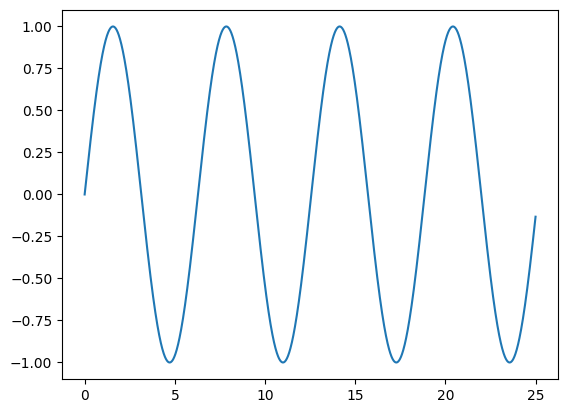

In [4]:
import matplotlib.pyplot as plt 

plt.plot(x,y)

In [5]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [6]:
df.head()

,Sine
0.000000,0.000000
0.011266,0.011266
0.022533,0.022531
0.033799,0.033793
0.045065,0.045050


In [7]:
len(df)

2220

In [8]:
test_percent = 0.2

In [9]:
test_length = np.round(len(df)*test_percent)

In [12]:
test_start_index = int(len(df)- test_length)

In [13]:
data_train = df.iloc[:test_start_index]

data_test = df.iloc[test_start_index:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scale.fit(data_train)

MinMaxScaler()

In [15]:
normalized_data_train = scale.transform(data_train)

normalized_data_test = scale.transform(data_test)

In [16]:
length = 70 

batch_size = 1

train_tsgenerator = TimeseriesGenerator(normalized_data_train, normalized_data_train, length = length , batch_size = batch_size)

In [17]:
n_features = 1
model = Sequential()
model.add(SimpleRNN(20, input_shape = (length,n_features)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(train_tsgenerator, epochs = 100)

Epoch 1/100
1706/1706 [==============================] - 6s 3ms/step - loss: 0.0042
Epoch 2/100
1706/1706 [==============================] - 5s 3ms/step - loss: 6.7351e-05
Epoch 3/100
1706/1706 [==============================] - 5s 3ms/step - loss: 2.7091e-05
Epoch 4/100
1706/1706 [==============================] - 5s 3ms/step - loss: 4.7687e-05
Epoch 5/100
1706/1706 [==============================] - 5s 3ms/step - loss: 2.6838e-05
Epoch 6/100
1706/1706 [==============================] - 5s 3ms/step - loss: 3.0662e-05
Epoch 7/100
1706/1706 [==============================] - 5s 3ms/step - loss: 3.5537e-05
Epoch 8/100
1706/1706 [==============================] - 5s 3ms/step - loss: 2.1622e-05
Epoch 9/100
1706/1706 [==============================] - 5s 3ms/step - loss: 2.1151e-05
Epoch 10/100
1706/1706 [==============================] - 5s 3ms/step - loss: 7.0411e-06
Epoch 11/100
1706/1706 [==============================] - 5s 3ms/step - loss: 2.1056e-05
Epoch 12/100
1706/1706 [==========

<Axes: >

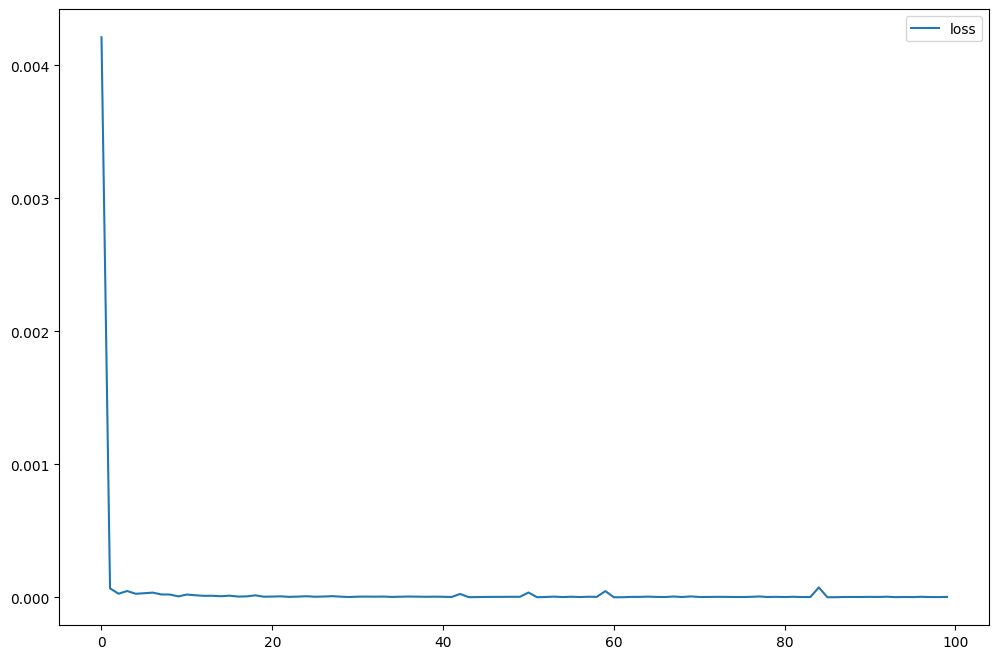

In [21]:
df_model_loss = pd.DataFrame(model.history.history)

df_model_loss.plot(figsize = (12,8))

In [20]:
test_tsgenerator  = TimeseriesGenerator(normalized_data_test, normalized_data_test, length = length, batch_size =1)

In [24]:
first_eval_batch = normalized_data_train[-length:]

In [25]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [26]:
test_predictions = []
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(data_test)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 11ms/step


In [27]:
true_predictions = scale.inverse_transform(test_predictions)

In [28]:
data_test['Predictions'] = true_predictions

C:\Users\dgmur\AppData\Local\Temp\ipykernel_17396\2223091423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [29]:
data_test

,Sine,Predictions
20.009013,0.916586,0.909634
20.020279,0.921033,0.897982
20.031546,0.925362,0.875823
20.042812,0.929574,0.844460
20.054078,0.933668,0.804866
...,...,...
24.954935,-0.176871,-1.724213
24.966201,-0.165771,-1.724213
24.977467,-0.154651,-1.724214
24.988734,-0.143510,-1.724215


<Axes: >

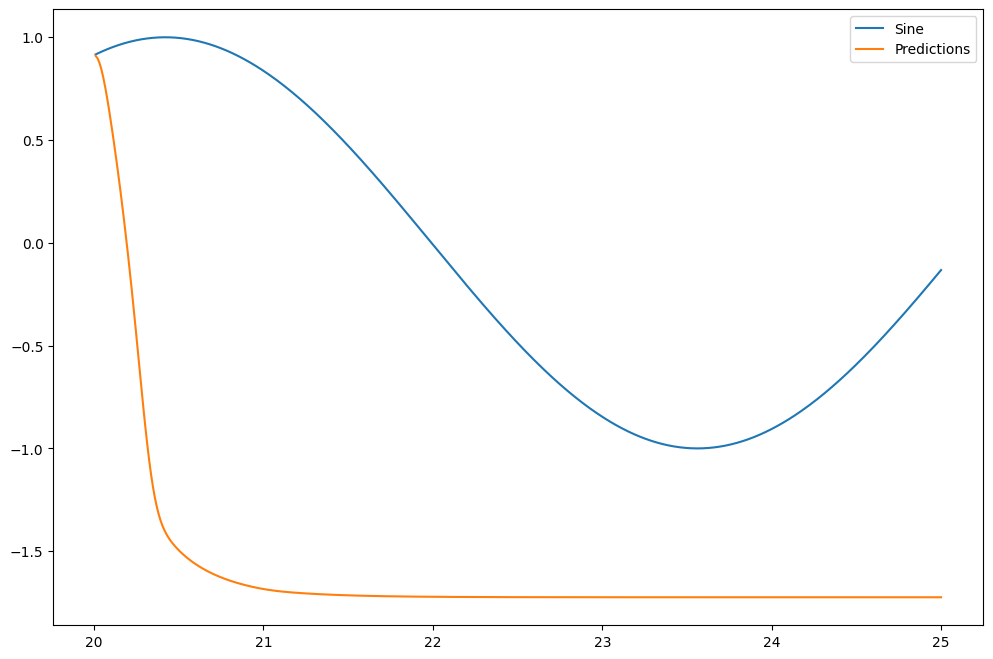

In [30]:
data_test.plot(figsize = (12,8))